In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split

In [3]:
os.getcwd()

'C:\\Users\\sunilchawla\\Desktop\\ass3\\code'

In [4]:
path = "../creditcard/"

In [5]:
data = pd.read_csv(path + "creditcard.csv")

In [6]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [8]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

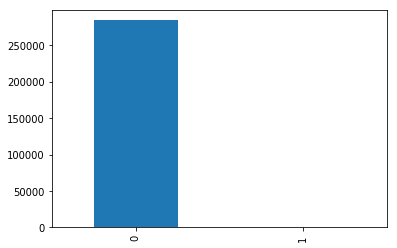

In [10]:
data.Class.value_counts().plot(kind = 'bar')

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
data['scaled_Amount'] = StandardScaler().fit_transform(data['Amount'].reshape(-1, 1))
data = data.drop(['Time', 'Amount'], axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [88]:
X = data.ix[:, data.columns != 'Class']
y = data.ix[:, data.columns == 'Class']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [95]:
data_train = pd.concat([X_train, y_train], axis=1)

In [176]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (199364, 29)
Number transactions y_train dataset:  (199364, 1)
Number transactions X_test dataset:  (85443, 29)
Number transactions y_test dataset:  (85443, 1)


# confusion_matrix function

In [18]:
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label')

# ROC function

In [19]:
def plot_roc_accu(model,X_train,y_train,X_test,y_test):
    tmp = model.fit(X_train, y_train.ravel())
    y_pred_sample_score = tmp.predict_proba(X_test)[:,1]

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_sample_score)
    roc_auc = auc(fpr,tpr)

    # Plot ROC
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.0])
    plt.ylim([-0.1,1.01])
    plt.ylabel('True Positive Rate(Recall)')
    plt.xlabel('False Positive Rate(1-Specificity)')
    plt.show()

# PRC function

In [20]:
def plot_prc(model,X_train,y_train,X_test,y_test):
    tmp = model.fit(X_train, y_train.ravel())
    y_test_predictions_prob = tmp.predict_proba(X_test)[:,1]
    
    precision, recall, thresholds = precision_recall_curve(y_test, y_test_predictions_prob)
    
    # Plot Precision-Recall curve
    plt.plot(recall, precision)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall curve')
    plt.legend(loc="lower left")

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

# Resampling 

In [101]:
data_train['Class'].value_counts()

0    199019
1       345
Name: Class, dtype: int64

In [102]:
count_class_0 = 199019
count_class_1 = 345

#divide the data by class
data_class_0 = data_train[data_train['Class'] == 0]
data_class_1 = data_train[data_train['Class'] == 1]

# Random under sampling
In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information

In [103]:
data_class_0_under = data_class_0.sample(count_class_1)
data_train_under = pd.concat([data_class_0_under, data_class_1], axis=0)

In [104]:
data_train_under.Class.value_counts()

1    345
0    345
Name: Class, dtype: int64

In [105]:
data_train_under.shape

(690, 30)

In [106]:
X_train_under = data_train_under.drop(columns = 'Class')
y_train_under = data_train_under['Class']

In [107]:
print("Number transactions X_train dataset: ", X_train_under.shape)
print("Number transactions y_train dataset: ", y_train_under.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (690, 29)
Number transactions y_train dataset:  (690,)
Number transactions X_test dataset:  (85443, 29)
Number transactions y_test dataset:  (85443, 1)


# <font color="red">Logistic Regression</font>

In [108]:
parameters = {'C': np.linspace(1, 10, 10)}
# lr on undersampling data
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=2, n_jobs=3)
clf.fit(X_train_under, y_train_under.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:    9.5s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=3,
       param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [109]:
clf.best_params_

{'C': 2.0}

In [110]:
lr1 = LogisticRegression(C = 2.0, penalty = 'l1', verbose=5)
lr1.fit(X_train_under, y_train_under.ravel())

[LibLinear]

LogisticRegression(C=2.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=5, warm_start=False)

### confusion matrix, Recall and Precision in the train dataset

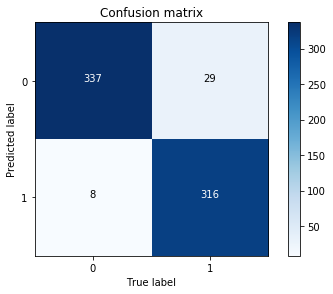

In [129]:
y_train_pred = lr1.predict(X_train_under)
cnf_matrix_train = confusion_matrix(y_train_pred, y_train_under)

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_train, classes=class_names, title='Confusion matrix')
plt.show()

In [112]:
print("Recall(TPR)in the train dataset: {}%".format(100*cnf_matrix_train[1,1]/(cnf_matrix_train[0,1]+cnf_matrix_train[1,1])))

y_train_proba_pred = lr1.predict_proba(X_train_under)
print("average_precision_score in the train dataset: {}%".format(100*average_precision_score(y_train_under,y_train_proba_pred[:,1])))

Recall(TPR)in the train dataset: 91.59420289855072%


### confusion matrix, Recall,Precision score  in the test dataset

In [115]:
y_test_pred = lr1.predict(X_test)
cnf_matrix_test = confusion_matrix(y_test_pred, y_test)

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_test, classes=class_names, title='Confusion matrix')
plt.show()

In [116]:
print("Recall(TPR)in the test dataset: {}%".format(100*cnf_matrix_test[1,1]/(cnf_matrix_test[0,1]+cnf_matrix_test[1,1])))

y_test_proba_pred = lr1.predict_proba(X_test)
print("average_precision_score in the test dataset: {}%".format(100*average_precision_score(y_test,y_test_proba_pred[:,1])))

Recall(TPR)in the test dataset: 91.15646258503402%


# ROC and PRC

[LibLinear]

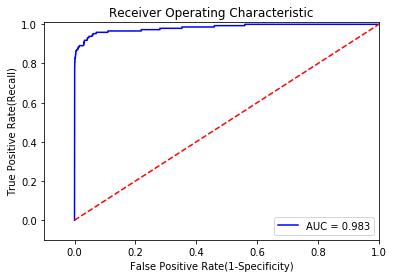

No handles with labels found to put in legend.


[LibLinear]

(None, None)

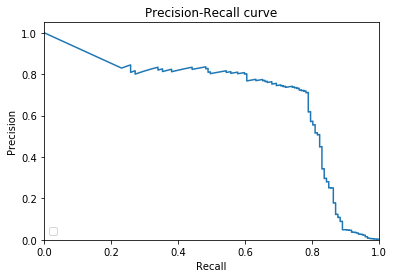

In [123]:
plot_roc_accu(lr1,X_train_under,y_train_under,X_test,y_test)
plot_prc(lr1,X_train_under,y_train_under,X_test,y_test)

# <font color="red">Random Forest</font>

In [124]:
clf= RandomForestClassifier()
clf.fit(X_train_under, y_train_under.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### confusion matrix, Recall and Precision in the train dataset

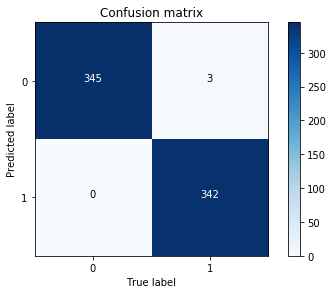

In [125]:
y_train_pred = clf.predict(X_train_under)
cnf_matrix_train = confusion_matrix(y_train_pred, y_train_under)
#confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_train, classes=class_names, title='Confusion matrix')
plt.show()

In [126]:
print("Recall(TPR)in the train dataset: {}%".format(100*cnf_matrix_train[1,1]/(cnf_matrix_train[0,1]+cnf_matrix_train[1,1])))

y_train_proba_pred = clf.predict_proba(X_train_under)
print("average_precision_score in the train dataset: {}%".format(100*average_precision_score(y_train_under,y_train_proba_pred[:,1])))

Recall(TPR)in the train dataset: 99.1304347826087%
average_precision_score in the train dataset: 100.0%


### confusion matrix, Recall and Precision in the test dataset

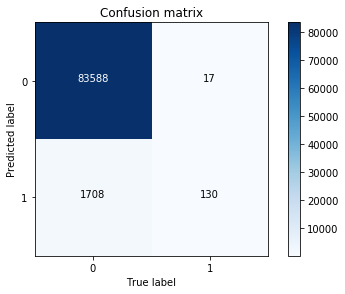

In [127]:
y_test_pred = clf.predict(X_test)
cnf_matrix_test = confusion_matrix(y_test_pred, y_test)

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_test, classes=class_names, title='Confusion matrix')
plt.show()

In [128]:
print("Recall(TPR)in the test dataset: {}%".format(100*cnf_matrix_test[1,1]/(cnf_matrix_test[0,1]+cnf_matrix_test[1,1])))

y_test_proba_pred = clf.predict_proba(X_test)
print("average_precision_score in the test dataset: {}%".format(100*average_precision_score(y_test,y_test_proba_pred[:,1])))

Recall(TPR)in the test dataset: 88.43537414965986%
average_precision_score in the test dataset: 63.82556577595001%


# ROC and PRC

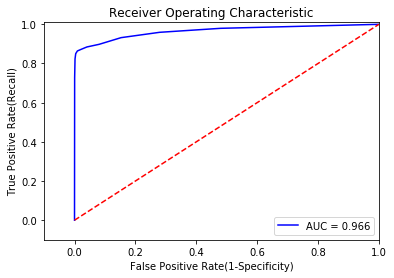

No handles with labels found to put in legend.


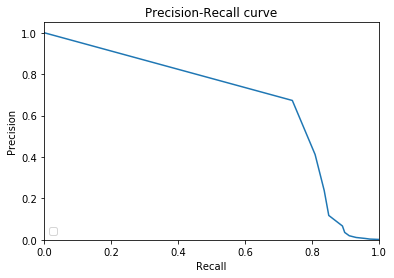

In [130]:
plot_roc_accu(clf,X_train_under,y_train_under,X_test,y_test)
plot_prc(clf,X_train_under,y_train_under,X_test,y_test)

# <font color="red">SVC</font>

In [131]:
clf= SVC()
clf.fit(X_train_under, y_train_under.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### confusion matrix, Recall and Precision in the train dataset

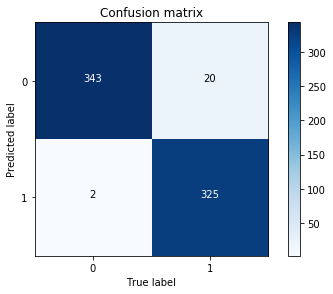

In [132]:
y_train_pred = clf.predict(X_train_under)
cnf_matrix_train = confusion_matrix(y_train_pred, y_train_under)
#confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_train, classes=class_names, title='Confusion matrix')
plt.show()

In [135]:
print("Recall(TPR)in the train dataset: {}%".format(100*cnf_matrix_train[1,1]/(cnf_matrix_train[0,1]+cnf_matrix_train[1,1])))

y_train_proba_pred = clf.decision_function(X_train_under)
print("average_precision_score in the train dataset: {}%".format(100*average_precision_score(y_train_under,y_train_proba_pred)))

Recall(TPR)in the train dataset: 94.20289855072464%
average_precision_score in the train dataset: 99.504262811893%


### confusion matrix, Recall and Precision in the test dataset

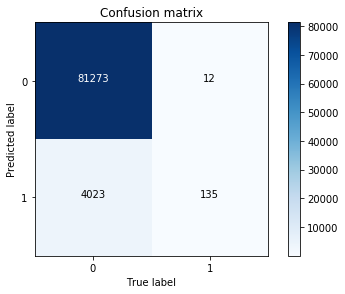

In [136]:
y_test_pred = clf.predict(X_test)
cnf_matrix_test = confusion_matrix(y_test_pred, y_test)

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_test, classes=class_names, title='Confusion matrix')
plt.show()

In [137]:
print("Recall(TPR)in the test dataset: {}%".format(100*cnf_matrix_test[1,1]/(cnf_matrix_test[0,1]+cnf_matrix_test[1,1])))

y_test_proba_pred = clf.decision_function(X_test)
print("average_precision_score in the test dataset: {}%".format(100*average_precision_score(y_test,y_test_proba_pred)))

Recall(TPR)in the test dataset: 91.83673469387755%
average_precision_score in the test dataset: 39.9811297147599%


# <font color="red">GBM</font>

In [139]:
clf = GradientBoostingClassifier()
clf.fit(X_train_under, y_train_under.ravel())

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

### confusion matrix, Recall and Precision in the train dataset

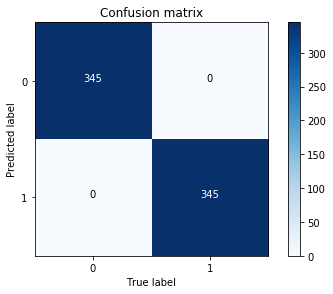

In [140]:
y_train_pred = clf.predict(X_train_under)
cnf_matrix_train = confusion_matrix(y_train_pred, y_train_under)
#confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_train, classes=class_names, title='Confusion matrix')
plt.show()

In [143]:
print("Recall(TPR)in the train dataset: {}%".format(100*cnf_matrix_train[1,1]/(cnf_matrix_train[0,1]+cnf_matrix_train[1,1])))

y_train_proba_pred = clf.predict_proba(X_train_under)
print("average_precision_score in the train dataset: {}%".format(100*average_precision_score(y_train_under,y_train_proba_pred[:,1])))

Recall(TPR)in the train dataset: 100.0%
average_precision_score in the train dataset: 99.99999999999999%


### confusion matrix, Recall and Precision in the test dataset

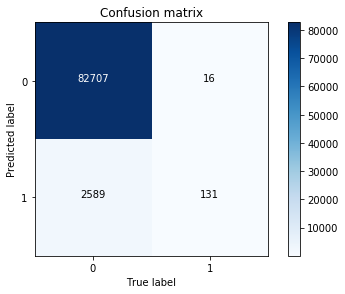

In [144]:
y_test_pred = clf.predict(X_test)
cnf_matrix_test = confusion_matrix(y_test_pred, y_test)

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_test, classes=class_names, title='Confusion matrix')
plt.show()

In [146]:
print("Recall(TPR)in the test dataset: {}%".format(100*cnf_matrix_test[1,1]/(cnf_matrix_test[0,1]+cnf_matrix_test[1,1])))

y_test_proba_pred = clf.predict_proba(X_test)
print("average_precision_score in the test dataset: {}%".format(100*average_precision_score(y_test,y_test_proba_pred[:,1])))

Recall(TPR)in the test dataset: 89.1156462585034%
average_precision_score in the test dataset: 74.46310324437071%


# ROC and PRC

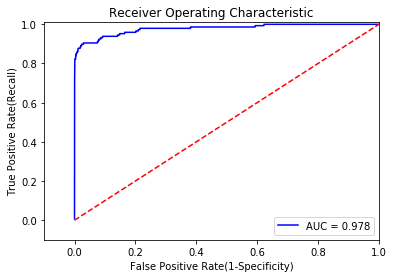

No handles with labels found to put in legend.


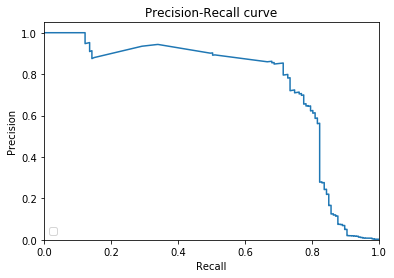

In [147]:
plot_roc_accu(clf,X_train_under,y_train_under,X_test,y_test)
plot_prc(clf,X_train_under,y_train_under,X_test,y_test)

# Random over sampling
The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfitting

In [148]:
data_class_1_over = data_class_1.sample(count_class_0, replace=True)
data_train_over = pd.concat([data_class_0, data_class_1_over], axis=0)

In [149]:
data_train_over.Class.value_counts()

1    199019
0    199019
Name: Class, dtype: int64

In [150]:
data_train_over.shape

(398038, 30)

In [151]:
X_train_over = data_train_over.drop(columns = 'Class')
y_train_over = data_train_over['Class']

In [152]:
print("Number transactions X_train over dataset: ", X_train_over.shape)
print("Number transactions y_train over dataset: ", y_train_over.shape)
print("Number transactions X_test over dataset: ", X_test.shape)
print("Number transactions y_test over dataset: ", y_test.shape)

Number transactions X_train over dataset:  (398038, 29)
Number transactions y_train over dataset:  (398038,)
Number transactions X_test over dataset:  (85443, 29)
Number transactions y_test over dataset:  (85443, 1)


# <font color="red">Logistic Regression</font>

In [153]:
parameters = {'C': np.linspace(1, 10, 10)}
# lr on undersampling data
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=2, n_jobs=3)
clf.fit(X_train_over, y_train_over.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:  1.8min
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:  2.5min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=3,
       param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [154]:
clf.best_params_

{'C': 8.0}

In [155]:
lr1 = LogisticRegression(C = 8.0, penalty = 'l1', verbose=5)
lr1.fit(X_train_over, y_train_over.ravel())

[LibLinear]

LogisticRegression(C=8.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=5, warm_start=False)

### confusion matrix, Recall and Precision in the train dataset

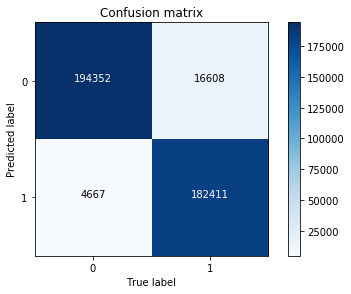

In [156]:
y_train_pred = lr1.predict(X_train_over)
cnf_matrix_train = confusion_matrix(y_train_pred, y_train_over)

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_train, classes=class_names, title='Confusion matrix')
plt.show()

In [157]:
print("Recall(TPR)in the train dataset: {}%".format(100*cnf_matrix_train[1,1]/(cnf_matrix_train[0,1]+cnf_matrix_train[1,1])))

y_train_proba_pred = lr1.predict_proba(X_train_over)
print("average_precision_score in the train dataset: {}%".format(100*average_precision_score(y_train_over,y_train_proba_pred[:,1])))

Recall(TPR)in the train dataset: 91.65506810907502%
average_precision_score in the train dataset: 98.95382199674877%


### confusion matrix, Recall,Precision score  in the test dataset

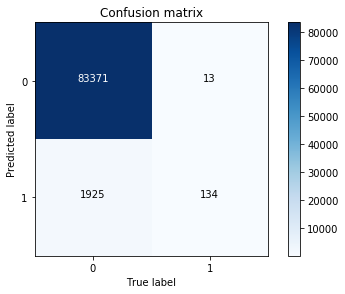

In [158]:
y_test_pred = lr1.predict(X_test)
cnf_matrix_test = confusion_matrix(y_test_pred, y_test)

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_test, classes=class_names, title='Confusion matrix')
plt.show()

In [159]:
print("Recall(TPR)in the test dataset: {}%".format(100*cnf_matrix_test[1,1]/(cnf_matrix_test[0,1]+cnf_matrix_test[1,1])))

y_test_proba_pred = lr1.predict_proba(X_test)
print("average_precision_score in the test dataset: {}%".format(100*average_precision_score(y_test,y_test_proba_pred[:,1])))

Recall(TPR)in the test dataset: 91.15646258503402%
average_precision_score in the test dataset: 73.554939534301%


# ROC and PRC

[LibLinear]

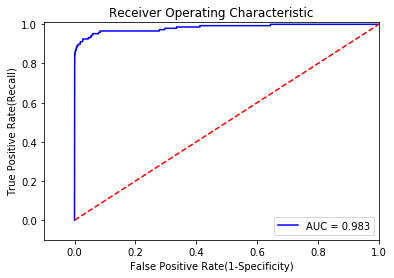

[LibLinear]

No handles with labels found to put in legend.


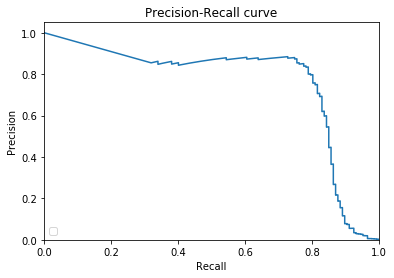

In [160]:
plot_roc_accu(lr1,X_train_over,y_train_over,X_test,y_test)
plot_prc(lr1,X_train_over,y_train_over,X_test,y_test)

# <font color="red">Random Forest</font>

In [161]:
clf= RandomForestClassifier()
clf.fit(X_train_over, y_train_over.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### confusion matrix, Recall and Precision in the train dataset

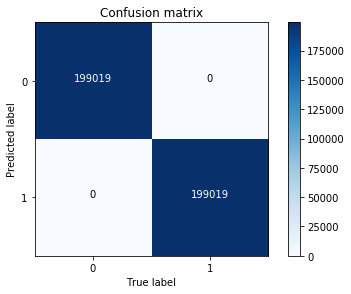

In [162]:
y_train_pred = clf.predict(X_train_over)
cnf_matrix_train = confusion_matrix(y_train_pred, y_train_over)
#confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_train, classes=class_names, title='Confusion matrix')
plt.show()

In [163]:
print("Recall(TPR)in the train dataset: {}%".format(100*cnf_matrix_train[1,1]/(cnf_matrix_train[0,1]+cnf_matrix_train[1,1])))

y_train_proba_pred = clf.predict_proba(X_train_over)
print("average_precision_score in the train dataset: {}%".format(100*average_precision_score(y_train_over,y_train_proba_pred[:,1])))

Recall(TPR)in the train dataset: 100.0%
average_precision_score in the train dataset: 100.0%


### confusion matrix, Recall and Precision in the test dataset

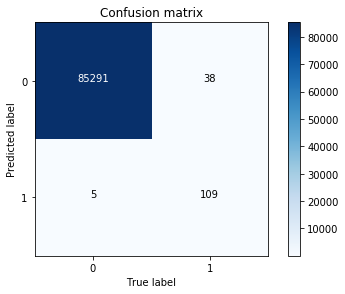

In [164]:
y_test_pred = clf.predict(X_test)
cnf_matrix_test = confusion_matrix(y_test_pred, y_test)

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_test, classes=class_names, title='Confusion matrix')
plt.show()

In [165]:
print("Recall(TPR)in the test dataset: {}%".format(100*cnf_matrix_test[1,1]/(cnf_matrix_test[0,1]+cnf_matrix_test[1,1])))

y_test_proba_pred = clf.predict_proba(X_test)
print("average_precision_score in the test dataset: {}%".format(100*average_precision_score(y_test,y_test_proba_pred[:,1])))

Recall(TPR)in the test dataset: 74.14965986394557%
average_precision_score in the test dataset: 82.1657608956262%


# <font color="brown">SVC</font>

In [166]:
clf= SVC()
clf.fit(X_train_over, y_train_over.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### confusion matrix, Recall and Precision in the train dataset

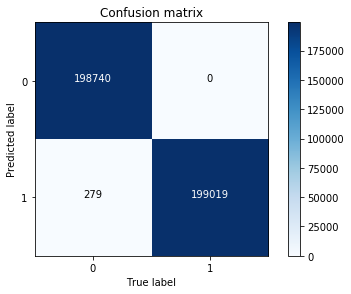

In [167]:
y_train_pred = clf.predict(X_train_over)
cnf_matrix_train = confusion_matrix(y_train_pred, y_train_over)
#confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_train, classes=class_names, title='Confusion matrix')
plt.show()

In [168]:
print("Recall(TPR)in the train dataset: {}%".format(100*cnf_matrix_train[1,1]/(cnf_matrix_train[0,1]+cnf_matrix_train[1,1])))

y_train_proba_pred = clf.decision_function(X_train_over)
print("average_precision_score in the train dataset: {}%".format(100*average_precision_score(y_train_over,y_train_proba_pred)))

Recall(TPR)in the train dataset: 100.0%
average_precision_score in the train dataset: 99.96178213541751%


### confusion matrix, Recall and Precision in the test dataset

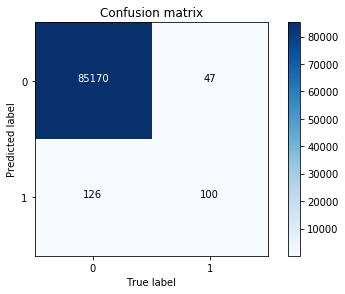

In [169]:
y_test_pred = clf.predict(X_test)
cnf_matrix_test = confusion_matrix(y_test_pred, y_test)

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_test, classes=class_names, title='Confusion matrix')
plt.show()

In [170]:
print("Recall(TPR)in the test dataset: {}%".format(100*cnf_matrix_test[1,1]/(cnf_matrix_test[0,1]+cnf_matrix_test[1,1])))

y_test_proba_pred = clf.decision_function(X_test)
print("average_precision_score in the test dataset: {}%".format(100*average_precision_score(y_test,y_test_proba_pred)))

Recall(TPR)in the test dataset: 68.02721088435374%
average_precision_score in the test dataset: 51.59605091435523%


# <font color="red">GBM</font>

In [171]:
clf = GradientBoostingClassifier()
clf.fit(X_train_over, y_train_over.ravel())

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

### confusion matrix, Recall and Precision in the train dataset

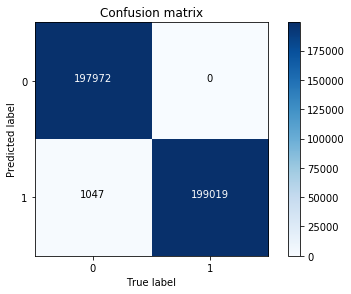

In [172]:
y_train_pred = clf.predict(X_train_over)
cnf_matrix_train = confusion_matrix(y_train_pred, y_train_over)
#confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_train, classes=class_names, title='Confusion matrix')
plt.show()

In [173]:
print("Recall(TPR)in the train dataset: {}%".format(100*cnf_matrix_train[1,1]/(cnf_matrix_train[0,1]+cnf_matrix_train[1,1])))

y_train_proba_pred = clf.predict_proba(X_train_over)
print("average_precision_score in the train dataset: {}%".format(100*average_precision_score(y_train_over,y_train_proba_pred[:,1])))

Recall(TPR)in the train dataset: 100.0%
average_precision_score in the train dataset: 99.95768747956285%


### confusion matrix, Recall and Precision in the test dataset

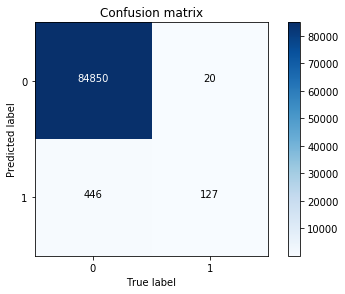

In [174]:
y_test_pred = clf.predict(X_test)
cnf_matrix_test = confusion_matrix(y_test_pred, y_test)

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_test, classes=class_names, title='Confusion matrix')
plt.show()

In [175]:
print("Recall(TPR)in the test dataset: {}%".format(100*cnf_matrix_test[1,1]/(cnf_matrix_test[0,1]+cnf_matrix_test[1,1])))

y_test_proba_pred = clf.predict_proba(X_test)
print("average_precision_score in the test dataset: {}%".format(100*average_precision_score(y_test,y_test_proba_pred[:,1])))

Recall(TPR)in the test dataset: 86.39455782312925%
average_precision_score in the test dataset: 77.05273528725989%


# SMOTE (Oversampling)

In [179]:
X = np.array(data.ix[:, data.columns != 'Class'])
y = np.array(data.ix[:, data.columns == 'Class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [180]:
from imblearn.over_sampling import SMOTE

In [181]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=4)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of X_train: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of y_train: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': [345]
Before OverSampling, counts of label '0': [199019] 

After OverSampling, the shape of X_train: (398038, 29)
After OverSampling, the shape of y_train: (398038,) 

After OverSampling, counts of label '1': 199019
After OverSampling, counts of label '0': 199019


# <font color="red">Logistic Regression</font>

In [166]:
parameters = {'C': np.linspace(1, 10, 10)}

lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=2, n_jobs=3)
clf.fit(X_train_res, y_train_res.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:  1.9min
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:  2.6min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=3,
       param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [167]:
clf.best_params_

{'C': 7.0}

In [168]:
lr1 = LogisticRegression(C = 7, penalty = 'l1', verbose=5)
lr1.fit(X_train_res, y_train_res.ravel())

[LibLinear]

LogisticRegression(C=7, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=5, warm_start=False)

### confusion matrix and Recall (True positive rate) in the train dataset

In [87]:
y_train_pred = lr1.predict(X_train)
cnf_matrix_train = confusion_matrix(y_train_pred, y_train)

In [89]:
cnf_matrix_train

array([[193983,     27],
       [  5036,    318]], dtype=int64)

In [90]:
print("Recall(TPR)in the train dataset: {}%".format(100*cnf_matrix_train[1,1]/(cnf_matrix_train[0,1]+cnf_matrix_train[1,1])))

Recall(TPR)in the train dataset: 92.17391304347827%


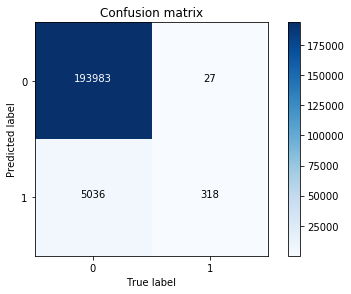

In [91]:
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_train, classes=class_names, title='Confusion matrix')
plt.show()

In [93]:
y_train_proba_pred = lr1.predict_proba(X_train)
print("average_precision_score in the train dataset: {}%".format(100*average_precision_score(y_train,y_train_proba_pred[:,1])))

average_precision_score in the train dataset: 73.6070643642571%


### confusion matrix and Recall (True positive rate) in the test dataset

In [96]:
y_test_pred = lr1.predict(X_test)
cnf_matrix_test = confusion_matrix(y_test_pred, y_test)

In [97]:
cnf_matrix_test

array([[83190,    12],
       [ 2106,   135]], dtype=int64)

In [98]:
print("Recall(TPR)in the test dataset: {}%".format(100*cnf_matrix_test[1,1]/(cnf_matrix_test[0,1]+cnf_matrix_test[1,1])))

Recall(TPR)in the test dataset: 91.83673469387755%


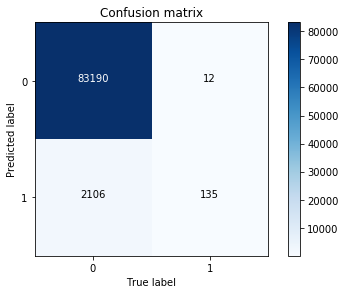

In [99]:
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_test, classes=class_names, title='Confusion matrix')
plt.show()

In [100]:
y_test_proba_pred = lr1.predict_proba(X_test)
print("average_precision_score in the test dataset: {}%".format(100*average_precision_score(y_test,y_test_proba_pred[:,1])))

average_precision_score in the test dataset: 73.5190925106701%


## ROC

[LibLinear]

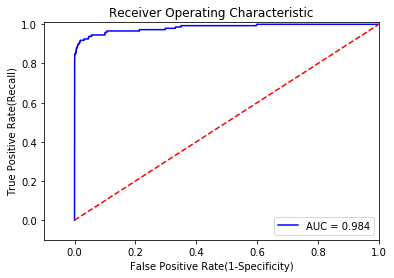

In [169]:
plot_roc_accu(lr1)

#### area under the ROC curve gives how accurately model predict TP and TN
#### our goal is to maximize area

# Precision-Recall curve

[LibLinear]

No handles with labels found to put in legend.


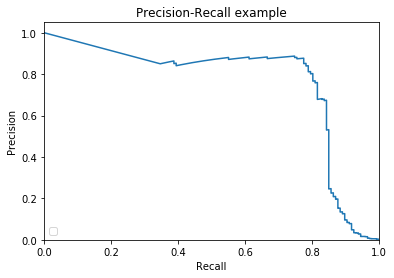

In [171]:
plot_prc(lr1)

# <font color="red">Decision Tree Classifier</font>

In [129]:
clf= DecisionTreeClassifier()
clf.fit(X_train_res, y_train_res.ravel())

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## confusion matrix and Recall (True positive rate) in the train dataset

In [130]:
y_train_pred = clf.predict(X_train)
cnf_matrix_train = confusion_matrix(y_train_pred, y_train)

In [131]:
cnf_matrix_train

array([[199019,      0],
       [     0,    345]], dtype=int64)

In [132]:
print("Recall(TPR)in the train dataset: {}%".format(100*cnf_matrix_train[1,1]/(cnf_matrix_train[0,1]+cnf_matrix_train[1,1])))

Recall(TPR)in the train dataset: 100.0%


In [133]:
y_train_proba_pred = clf.predict_proba(X_train)
print("average_precision_score in the train dataset: {}%".format(100*average_precision_score(y_train,y_train_proba_pred[:,1])))

average_precision_score in the train dataset: 100.0%


## confusion matrix and Recall (True positive rate) in the test dataset

In [157]:
y_test_pred = clf.predict(X_test)
cnf_matrix_test = confusion_matrix(y_test_pred, y_test)

In [158]:
cnf_matrix_test

array([[85128,    45],
       [  168,   102]], dtype=int64)

In [159]:
print("Recall(TPR)in the test dataset: {}%".format(100*cnf_matrix_test[1,1]/(cnf_matrix_test[0,1]+cnf_matrix_test[1,1])))

Recall(TPR)in the test dataset: 69.38775510204081%


In [137]:
y_test_proba_pred = clf.predict_proba(X_test)
print("average_precision_score in the test dataset: {}%".format(100*average_precision_score(y_test,y_test_proba_pred[:,1])))

average_precision_score in the test dataset: 31.275641588829707%


# <font color="red">Random Forest</font>

In [173]:
clf= RandomForestClassifier(n_estimators=10)
clf.fit(X_train_res, y_train_res.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## confusion matrix and Recall (True positive rate) in the train dataset

In [103]:
y_train_pred = clf.predict(X_train)
cnf_matrix_train = confusion_matrix(y_train_pred, y_train)

In [105]:
cnf_matrix_train

array([[199017,      0],
       [     2,    345]], dtype=int64)

In [106]:
print("Recall(TPR)in the train dataset: {}%".format(100*cnf_matrix_train[1,1]/(cnf_matrix_train[0,1]+cnf_matrix_train[1,1])))

Recall(TPR)in the train dataset: 100.0%


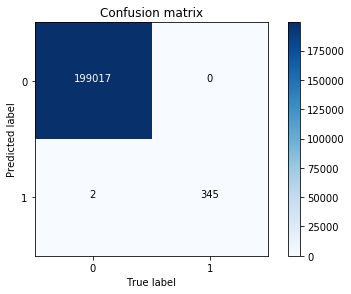

In [107]:
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_train, classes=class_names, title='Confusion matrix')
plt.show()

In [108]:
y_train_proba_pred = clf.predict_proba(X_train)
print("average_precision_score in the train dataset: {}%".format(100*average_precision_score(y_train,y_train_proba_pred[:,1])))

average_precision_score in the train dataset: 100.0%


## confusion matrix and Recall (True positive rate) in the test dataset

In [110]:
y_test_pred = clf.predict(X_test)
cnf_matrix_test = confusion_matrix(y_test_pred, y_test)

In [111]:
cnf_matrix_test

array([[85285,    32],
       [   11,   115]], dtype=int64)

In [112]:
print("Recall(TPR)in the test dataset: {}%".format(100*cnf_matrix_test[1,1]/(cnf_matrix_test[0,1]+cnf_matrix_test[1,1])))

Recall(TPR)in the test dataset: 78.2312925170068%


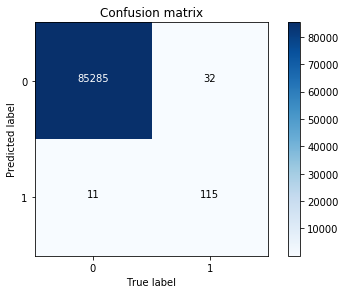

In [113]:
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_test, classes=class_names, title='Confusion matrix')
plt.show()

In [114]:
y_test_proba_pred = clf.predict_proba(X_test)
print("average_precision_score in the test dataset: {}%".format(100*average_precision_score(y_test,y_test_proba_pred[:,1])))

average_precision_score in the test dataset: 81.0421365741482%


# ROC

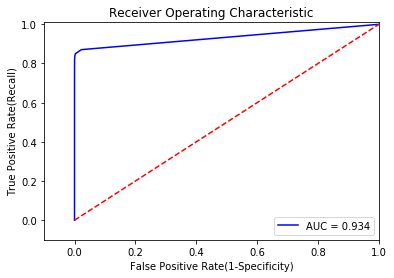

In [174]:
plot_roc_accu(clf)

# Precision-Recall curve

No handles with labels found to put in legend.


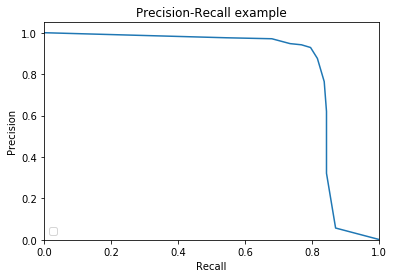

In [175]:
plot_prc(clf)

# <font color="red">SVC</font>

In [139]:
clf= SVC()
clf.fit(X_train_res, y_train_res.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## confusion matrix and Recall (True positive rate) in the train dataset

In [140]:
y_train_pred = clf.predict(X_train)
cnf_matrix_train = confusion_matrix(y_train_pred, y_train)

In [141]:
cnf_matrix_train

array([[198669,      0],
       [   350,    345]], dtype=int64)

In [142]:
print("Recall(TPR)in the train dataset: {}%".format(100*cnf_matrix_train[1,1]/(cnf_matrix_train[0,1]+cnf_matrix_train[1,1])))

Recall(TPR)in the train dataset: 100.0%


In [156]:
y_train_proba_pred = clf.decision_function(X_train)
print("average_precision_score in the train dataset: {}%".format(100*average_precision_score(y_train,y_train_proba_pred)))

average_precision_score in the train dataset: 88.66866958390354%


## confusion matrix and Recall (True positive rate) in the test dataset

In [160]:
y_test_pred = clf.predict(X_test)
cnf_matrix_test = confusion_matrix(y_test_pred, y_test)

In [161]:
cnf_matrix_test

array([[85128,    45],
       [  168,   102]], dtype=int64)

In [162]:
print("Recall(TPR)in the test dataset: {}%".format(100*cnf_matrix_test[1,1]/(cnf_matrix_test[0,1]+cnf_matrix_test[1,1])))

Recall(TPR)in the test dataset: 69.38775510204081%


In [163]:
y_test_proba_pred = clf.decision_function(X_test)
print("average_precision_score in the test dataset: {}%".format(100*average_precision_score(y_test,y_test_proba_pred)))

average_precision_score in the test dataset: 48.46093346592291%


# <font color="red">Gradient boosting(GBM)</font>

In [182]:
clf = GradientBoostingClassifier()
clf.fit(X_train_res, y_train_res.ravel())

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

## confusion matrix and Recall (True positive rate) in the train dataset

In [183]:
y_train_pred = clf.predict(X_train)
cnf_matrix_train = confusion_matrix(y_train_pred, y_train)

In [184]:
print("Recall(TPR)in the train dataset: {}%".format(100*cnf_matrix_train[1,1]/(cnf_matrix_train[0,1]+cnf_matrix_train[1,1])))

Recall(TPR)in the train dataset: 97.3913043478261%


In [185]:
y_train_proba_pred = clf.predict_proba(X_train)
print("average_precision_score in the train dataset: {}%".format(100*average_precision_score(y_train,y_train_proba_pred[:,1])))

average_precision_score in the train dataset: 86.13680874814665%


## confusion matrix and Recall (True positive rate) in the test dataset

In [186]:
y_test_pred = clf.predict(X_test)
cnf_matrix_test = confusion_matrix(y_test_pred, y_test)

In [187]:
cnf_matrix_test

array([[84476,    16],
       [  820,   131]], dtype=int64)

In [188]:
print("Recall(TPR)in the test dataset: {}%".format(100*cnf_matrix_test[1,1]/(cnf_matrix_test[0,1]+cnf_matrix_test[1,1])))

Recall(TPR)in the test dataset: 89.1156462585034%


In [189]:
y_test_proba_pred = clf.predict_proba(X_test)
print("average_precision_score in the test dataset: {}%".format(100*average_precision_score(y_test,y_test_proba_pred[:,1])))

average_precision_score in the test dataset: 78.1406360741244%


# <font color="red">Light Gradient boosting(LGBM)</font>

In [182]:
clf = LGBMClassifier()
clf.fit(X_train_res, y_train_res.ravel())

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

### confusion matrix and Recall (True positive rate) in the train dataset

In [192]:
y_train_pred = clf.predict(X_train)
cnf_matrix_train = confusion_matrix(y_train_pred, y_train)

In [184]:
cnf_matrix_train

array([[198908,      0],
       [   111,    345]], dtype=int64)

In [185]:
print("Recall(TPR)in the train dataset: {}%".format(100*cnf_matrix_train[1,1]/(cnf_matrix_train[0,1]+cnf_matrix_train[1,1])))

Recall(TPR)in the train dataset: 100.0%


In [186]:
y_train_proba_pred = clf.predict_proba(X_train)
print("average_precision_score in the train dataset: {}%".format(100*average_precision_score(y_train,y_train_proba_pred[:,1])))

average_precision_score in the train dataset: 99.57085654727878%


## confusion matrix and Recall (True positive rate) in the test dataset

In [187]:
y_test_pred = clf.predict(X_test)
cnf_matrix_test = confusion_matrix(y_test_pred, y_test)

In [188]:
cnf_matrix_test

array([[85219,    25],
       [   77,   122]], dtype=int64)

In [189]:
print("Recall(TPR)in the test dataset: {}%".format(100*cnf_matrix_test[1,1]/(cnf_matrix_test[0,1]+cnf_matrix_test[1,1])))

Recall(TPR)in the test dataset: 82.99319727891157%


In [190]:
y_test_proba_pred = clf.predict_proba(X_test)
print("average_precision_score in the test dataset: {}%".format(100*average_precision_score(y_test,y_test_proba_pred[:,1])))

average_precision_score in the test dataset: 77.56436234574842%


# ROC

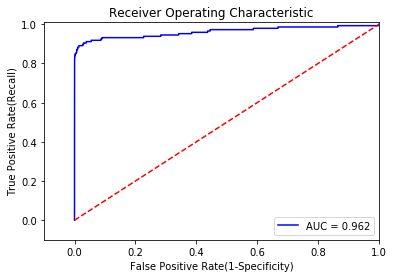

In [191]:
plot_roc_accu(clf)

# PRC 

No handles with labels found to put in legend.


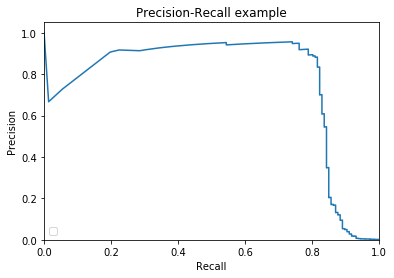

In [192]:
plot_prc(clf)

# <font color="red">Adaboosting</font>

In [193]:
clf = AdaBoostClassifier()
clf.fit(X_train_res, y_train_res.ravel())

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

### confusion matrix and Recall (True positive rate) in the train dataset

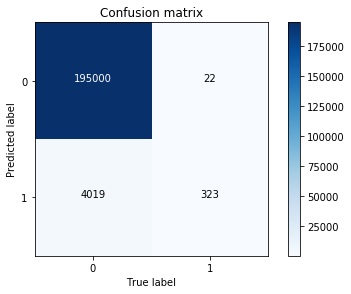

In [194]:
y_train_pred = clf.predict(X_train)
cnf_matrix_train = confusion_matrix(y_train_pred, y_train)
#confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_train, classes=class_names, title='Confusion matrix')
plt.show()

In [195]:
print("Recall(TPR)in the train dataset: {}%".format(100*cnf_matrix_train[1,1]/(cnf_matrix_train[0,1]+cnf_matrix_train[1,1])))

y_train_proba_pred = clf.predict_proba(X_train)
print("average_precision_score in the train dataset: {}%".format(100*average_precision_score(y_train,y_train_proba_pred[:,1])))

Recall(TPR)in the train dataset: 93.6231884057971%
average_precision_score in the train dataset: 82.70523977080802%


### confusion matrix and Recall (True positive rate) in the test dataset

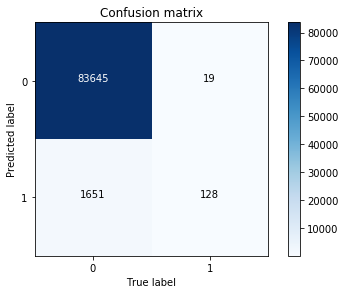

In [196]:
y_test_pred = clf.predict(X_test)
cnf_matrix_test = confusion_matrix(y_test_pred, y_test)

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_test, classes=class_names, title='Confusion matrix')
plt.show()

In [197]:
print("Recall(TPR)in the test dataset: {}%".format(100*cnf_matrix_test[1,1]/(cnf_matrix_test[0,1]+cnf_matrix_test[1,1])))

y_test_proba_pred = clf.predict_proba(X_test)
print("average_precision_score in the test dataset: {}%".format(100*average_precision_score(y_test,y_test_proba_pred[:,1])))

Recall(TPR)in the test dataset: 87.07482993197279%
average_precision_score in the test dataset: 77.96274589639863%


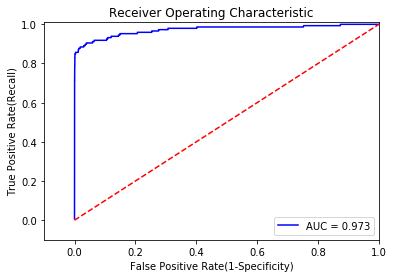

No handles with labels found to put in legend.


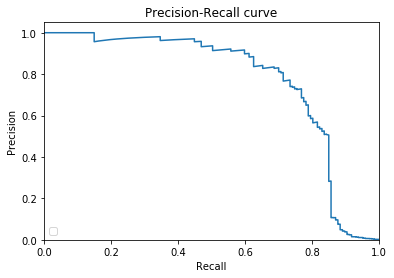

In [199]:
plot_roc_accu(clf,X_train,y_train,X_test,y_test)
plot_prc(clf,X_train,y_train,X_test,y_test)

   # <font color="lime">Over-sampling followed by under-sampling</font>
   # SMOTE + TOMEK

In [14]:
from imblearn.combine import SMOTETomek

In [15]:
X = np.array(data.ix[:, data.columns != 'Class'])
y = np.array(data.ix[:, data.columns == 'Class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [16]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

smt = SMOTETomek(ratio='auto', random_state=5)
X_train_res, y_train_res = smt.fit_sample(X_train, y_train.ravel())

print('After OverSampling followed by underSampling, the shape of X_train: {}'.format(X_train_res.shape))
print('After OverSampling followed by underSampling, the shape of y_train: {} \n'.format(y_train_res.shape))

print("After OverSampling followed by underSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling followed by underSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': [345]
Before OverSampling, counts of label '0': [199019] 

After OverSampling followed by underSampling, the shape of X_train: (398038, 29)
After OverSampling followed by underSampling, the shape of y_train: (398038,) 

After OverSampling followed by underSampling, counts of label '1': 199019
After OverSampling followed by underSampling, counts of label '0': 199019


# <font color="red">Logistic Regression</font>

In [20]:
parameters = {'C': np.linspace(1, 10, 10),
             'penalty':['l1', 'l2']}

lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=2, n_jobs=3)
clf.fit(X_train_res, y_train_res.ravel())

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:  4.0min
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed: 10.8min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=3,
       param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [21]:
clf.best_params_

{'C': 4.0, 'penalty': 'l2'}

In [22]:
lr1 = LogisticRegression(C = 4.0, penalty = 'l2', verbose=5)
lr1.fit(X_train_res, y_train_res.ravel())

[LibLinear]

LogisticRegression(C=4.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=5, warm_start=False)

### confusion matrix, Recall and Precision score in the train dataset

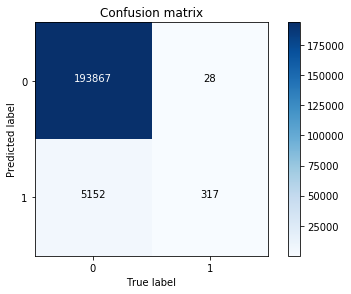

In [23]:
y_train_pred = lr1.predict(X_train)
cnf_matrix_train = confusion_matrix(y_train_pred, y_train)

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_train, classes=class_names, title='Confusion matrix')
plt.show()

In [24]:
print("Recall(TPR)in the train dataset: {}%".format(100*cnf_matrix_train[1,1]/(cnf_matrix_train[0,1]+cnf_matrix_train[1,1])))

y_train_proba_pred = lr1.predict_proba(X_train)
print("average_precision_score in the train dataset: {}%".format(100*average_precision_score(y_train,y_train_proba_pred[:,1])))

Recall(TPR)in the train dataset: 91.8840579710145%
average_precision_score in the train dataset: 73.53822051178817%


### confusion matrix, Recall and Precision in the test dataset

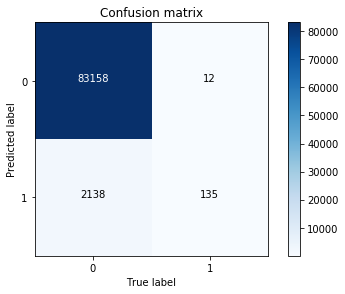

In [25]:
y_test_pred = lr1.predict(X_test)
cnf_matrix_test = confusion_matrix(y_test_pred, y_test)

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_test, classes=class_names, title='Confusion matrix')
plt.show()

In [26]:
print("Recall(TPR)in the test dataset: {}%".format(100*cnf_matrix_test[1,1]/(cnf_matrix_test[0,1]+cnf_matrix_test[1,1])))

y_test_proba_pred = lr1.predict_proba(X_test)
print("average_precision_score in the test dataset: {}%".format(100*average_precision_score(y_test,y_test_proba_pred[:,1])))

Recall(TPR)in the test dataset: 91.83673469387755%
average_precision_score in the test dataset: 73.45705377087836%


[LibLinear]

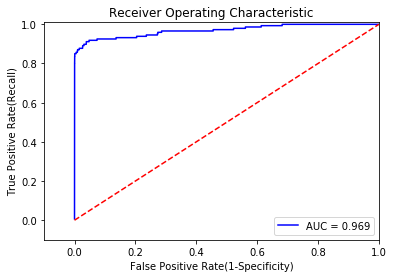

[LibLinear]

No handles with labels found to put in legend.


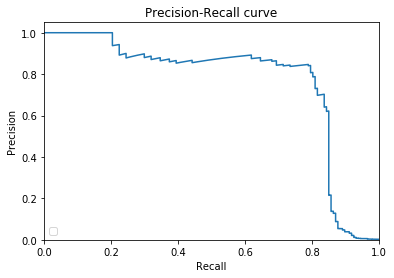

In [27]:
plot_roc_accu(lr1,X_train,y_train,X_test,y_test)
plot_prc(lr1,X_train,y_train,X_test,y_test)

# <font color="red">Random Forest</font>

In [29]:
param_grid = {"max_depth": [3,5,7, None],
              "n_estimators":[3,5,10],
              "max_features": [5,6,7,8]}

rf = RandomForestClassifier()
clf = GridSearchCV(rf, param_grid = param_grid, cv=5, verbose=2, n_jobs=3)
clf.fit(X_train_res, y_train_res.ravel())

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:   55.9s
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:  6.6min
[Parallel(n_jobs=3)]: Done 240 out of 240 | elapsed: 15.7min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=3,
       param_grid={'max_depth': [3, 5, 7, None], 'n_estimators': [3, 5, 10], 'max_features': [5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [30]:
clf.best_params_

{'max_depth': None, 'max_features': 7, 'n_estimators': 10}

In [23]:
rf1 = RandomForestClassifier(max_depth = None, max_features = 7, n_estimators = 10)
rf1.fit(X_train_res, y_train_res.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### confusion matrix, Recall and Precision score in the train dataset

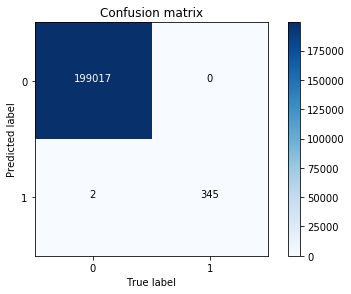

In [32]:
y_train_pred = rf1.predict(X_train)
cnf_matrix_train = confusion_matrix(y_train_pred, y_train)

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_train, classes=class_names, title='Confusion matrix')
plt.show()

In [33]:
print("Recall(TPR)in the train dataset: {}%".format(100*cnf_matrix_train[1,1]/(cnf_matrix_train[0,1]+cnf_matrix_train[1,1])))

y_train_proba_pred = rf1.predict_proba(X_train)
print("average_precision_score in the train dataset: {}%".format(100*average_precision_score(y_train,y_train_proba_pred[:,1])))

Recall(TPR)in the train dataset: 100.0%
average_precision_score in the train dataset: 99.9991622685767%


### confusion matrix, Recall and Precision score in the test dataset

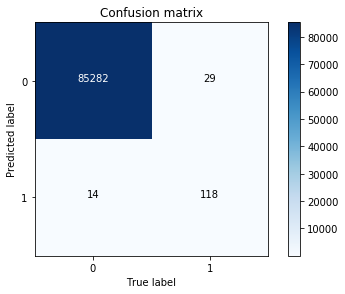

In [42]:
y_test_pred = rf1.predict(X_test)
cnf_matrix_test = confusion_matrix(y_test_pred, y_test)

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_test, classes=class_names, title='Confusion matrix')
plt.show()

In [43]:
print("Recall(TPR)in the test dataset: {:.2f}%".format(100*cnf_matrix_test[1,1]/(cnf_matrix_test[0,1]+cnf_matrix_test[1,1])))

y_test_proba_pred = rf1.predict_proba(X_test)
print("average_precision_score in the test dataset: {:.2f}%".format(100*average_precision_score(y_test,y_test_proba_pred[:,1])))

Recall(TPR)in the test dataset: 80.27%
average_precision_score in the test dataset: 81.94%


# <font color="red">SVC</font>

In [ ]:
# param_grid = {'C': np.linspace(1, 10, 10),
#               'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
#               'kernel': ['linear','rbf']}

# svm = SVC()
# clf = GridSearchCV(svm, param_grid = param_grid, cv=5, verbose=2, n_jobs=3)
# clf.fit(X_train_res, y_train_res.ravel())

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [29]:
svm = SVC(C = 1, gamma = 0.001, kernel = 'rbf')
svm.fit(X_train_res, y_train_res.ravel())

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### confusion matrix, Recall and Precision score in the train dataset

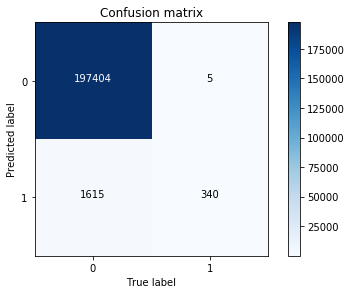

In [24]:
y_train_pred = svm.predict(X_train)
cnf_matrix_train = confusion_matrix(y_train_pred, y_train)

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_train, classes=class_names, title='Confusion matrix')
plt.show()

In [25]:
print("Recall(TPR)in the train dataset: {}%".format(100*cnf_matrix_train[1,1]/(cnf_matrix_train[0,1]+cnf_matrix_train[1,1])))

y_train_proba_pred = svm.decision_function(X_train)
print("average_precision_score in the train dataset: {}%".format(100*average_precision_score(y_train,y_train_proba_pred)))

Recall(TPR)in the train dataset: 98.55072463768116%
average_precision_score in the train dataset: 80.05173086621461%


### confusion matrix, Recall and Precision score in the test dataset

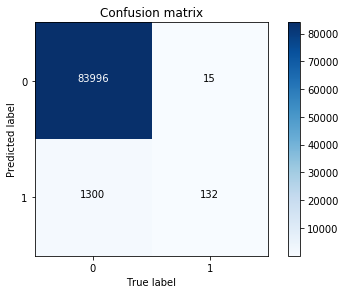

In [31]:
y_test_pred = svm.predict(X_test)
cnf_matrix_test = confusion_matrix(y_test_pred, y_test)

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_test, classes=class_names, title='Confusion matrix')
plt.show()

In [32]:
print("Recall(TPR)in the test dataset: {:.2f}%".format(100*cnf_matrix_test[1,1]/(cnf_matrix_test[0,1]+cnf_matrix_test[1,1])))

y_test_proba_pred = svm.decision_function(X_test)
print("average_precision_score in the test dataset: {:.2f}%".format(100*average_precision_score(y_test,y_test_proba_pred)))

Recall(TPR)in the test dataset: 89.80%
average_precision_score in the test dataset: 72.17%


# <font color="red">Gradient boosting(GBM)</font>

In [34]:
gbm = GradientBoostingClassifier(n_estimators=100, max_depth=1)
gbm.fit(X_train_res, y_train_res.ravel())

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

### confusion matrix, Recall and Precision score in the train dataset

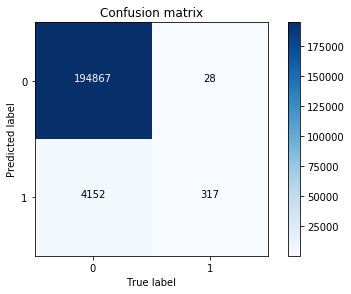

In [35]:
y_train_pred = gbm.predict(X_train)
cnf_matrix_train = confusion_matrix(y_train_pred, y_train)

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_train, classes=class_names, title='Confusion matrix')
plt.show()

In [36]:
print("Recall(TPR)in the train dataset: {}%".format(100*cnf_matrix_train[1,1]/(cnf_matrix_train[0,1]+cnf_matrix_train[1,1])))

y_train_proba_pred = gbm.predict_proba(X_train)
print("average_precision_score in the train dataset: {}%".format(100*average_precision_score(y_train,y_train_proba_pred[:,1])))

Recall(TPR)in the train dataset: 91.8840579710145%
average_precision_score in the train dataset: 73.02542371424943%


### confusion matrix, Recall and Precision score in the test dataset

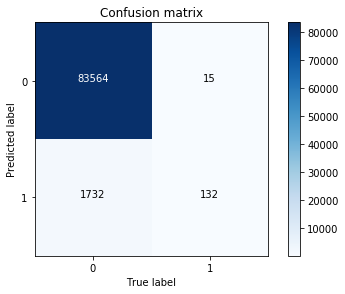

In [37]:
y_test_pred = gbm.predict(X_test)
cnf_matrix_test = confusion_matrix(y_test_pred, y_test)

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_test, classes=class_names, title='Confusion matrix')
plt.show()

In [38]:
print("Recall(TPR)in the test dataset: {:.2f}%".format(100*cnf_matrix_test[1,1]/(cnf_matrix_test[0,1]+cnf_matrix_test[1,1])))

y_test_proba_pred = gbm.predict_proba(X_test)
print("average_precision_score in the test dataset: {:.2f}%".format(100*average_precision_score(y_test,y_test_proba_pred[:,1])))

Recall(TPR)in the test dataset: 89.80%
average_precision_score in the test dataset: 71.76%
